# Homework 6
## Due:  Tuesday, October 10 at 11:59 PM

# Problem 1: Bank Account Revisited

We are going to rewrite the bank account closure problem we had a few assignments ago, only this time developing a formal class for a Bank User and Bank Account to use in our closure (recall previously we just had a nonlocal variable amount that we changed). 

### Some Preliminaries:
First we are going to define two types of bank accounts.  Use the code below to do this:

In [1]:
from enum import Enum
class AccountType(Enum):
    SAVINGS = 1
    CHECKING = 2

An Enum stands for an enumeration, it's a convenient way for you to define lists of things. Typing:

In [2]:
AccountType.SAVINGS

<AccountType.SAVINGS: 1>

In [3]:
AccountType.SAVINGS.value

1

returns a Python representation of an enumeration. You can compare these account types:

In [4]:
AccountType.SAVINGS == AccountType.SAVINGS

True

In [5]:
AccountType.SAVINGS == AccountType.CHECKING

False

To get a string representation of an Enum, you can use:

In [6]:
AccountType.SAVINGS.name

'SAVINGS'

### Part 1: Create a BankAccount class with the following specification:

Constructor is `BankAccount(self, owner, accountType)` where `owner` is a string representing the name of the account owner and `accountType` is one of the AccountType enums

Methods `withdraw(self, amount)` and `deposit(self, amount)` to modify the account balance of the account

Override methods `__str__` to write an informative string of the account owner and the type of account, and `__len__` to return the balance of the account

In [7]:
class BankAccount():
    
    def __init__(self, owner, accountType):
        self.owner = owner
        self.accountType = accountType
        self.balance = 0 # The initial balance of a BankAccount should be 0
    
    def withdraw(self, amount):
        if amount > self.balance:
            raise Exception('BankAccount_withdraw Error: In %s , you are attempting to withdraw more than the current balance. \n' % self.accountType.name)
        self.balance = self.balance - amount
        print('BankAccount_withdraw Sucessful: \n In %s , current balance: %f \n' % (self.accountType.name, self.balance))
    
    def deposit(self, amount):
        self.balance = self.balance + amount
        print('BankAccount_deposit Sucessful: \n In %s , current balance: %f \n' % (self.accountType.name, self.balance))
    
    def __str__(self):
        return ('-----BankAccount-----\n owner: %s \n Accont Type: %s \n---------------------\n' % (self.owner, self.accountType.name))
    
    def __len__(self):
        return self.balance
        
        

### Part 2:  Write a class BankUser with the following specification:

Constructor `BankUser(self, owner)` where `owner` is the name of the account.

Method `addAccount(self, accountType)` - to start, a user will have no accounts when the BankUser object is created. `addAccount` will add a new account to the user of the `accountType` specified. **Only one savings/checking account per user, return appropriate error otherwise**

Methods `getBalance(self, accountType)`, `deposit(self, accountType, amount)`, and `withdraw(self, accountType, amount)` for a specific AccountType.

Override `__str__` to have an informative summary of user's accounts.

In [8]:
class BankUser():
    
    def __init__(self, owner):
        self.owner = owner
        self.savings_account = None
        self.checking_account = None
        
    def addAccount(self, accountType):
        if accountType == AccountType.SAVINGS: # Add a savings account
            if self.savings_account != None:
                raise Exception('BankUser_addAccount Limit Error: You can have only 1 SAVINGS account. \n')
            else:
                self.savings_account = BankAccount(self.owner, AccountType.SAVINGS)
                print('BankUser_addAccount Successful: \n AccountType: SAVINGS \n')
        
        elif accountType == AccountType.CHECKING: # Add a checking account
            if self.checking_account != None:
                raise Exception('BankUser_addAccount Limit Error: You can have only 1 CHECKING account. \n')
            else:
                self.checking_account = BankAccount(self.owner, AccountType.CHECKING)
                print('BankUser_addAccount Successful: \n AccountType: CHECKING \n')
         
        else: # Add some other non-specified type of account. Exception raised.
            raise Exception('BankUser_addAccount Type Error: You can add either a SAVINGS or CHECKING account. \n')
    
    
    def getBalance(self, accountType):
        if accountType == AccountType.SAVINGS: # Get balance of the savings account
            if self.savings_account != None:
                print('BankUser_getBalance: \n In %s , current balance: %f \n' % (accountType.name, self.savings_account.balance))
                return self.savings_account.balance
            else:
                raise Exception('BankUser_getBalance Error: You do not have a SAVINGS account yet. \n')
        
        elif accountType == AccountType.CHECKING: # Get balance of the checking account
            if self.checking_account != None:
                print('BankUser_getBalance: \n In %s , current balance: %f \n' % (accountType.name, self.checking_account.balance))
                return self.checking_account.balance
            else:
                raise Exception('BankUser_getBalance Error: You do not have a CHECKING account yet. \n')
        
        else: # Get balance of some other non-specified type of account. Exception raised.
            raise Exception('BankUser_getBalance Type Error: You can get balance from either your SAVINGS or CHECKING account. \n')
     
    
    def deposit(self, accountType, amount):
        if accountType == AccountType.SAVINGS: # Deposit to the savings account
            if self.savings_account != None:
                self.savings_account.deposit(amount)
            else:
                raise Exception('BankUser_deposit Error: You do not have a SAVINGS account yet. \n')
        elif accountType == AccountType.CHECKING: # Deposit to the checking account
            if self.checking_account != None:
                self.checking_account.deposit(amount)
            else:
                raise Exception('BankUser_deposit Error: You do not have a CHECKING account yet. \n')
        else: # Deposit to some other non-specified type of account. Exception raised.
            raise Exception('BankUser_deposit Type Error: You can deposit to either your SAVINGS or CHECKING account. \n')
    
    
    def withdraw(self, accountType, amount):
        if accountType == AccountType.SAVINGS: # Withdraw from the savings account
            if self.savings_account != None:
                self.savings_account.withdraw(amount)
            else:
                raise Exception('BankUser_withdraw Error: You do not have a SAVINGS account yet. \n')
        elif accountType == AccountType.CHECKING: # Withdraw from the checking account
            if self.checking_account != None:
                self.checking_account.withdraw(amount)
            else:
                raise Exception('BankUser_withdraw Error: You do not have a CHECKING account yet. \n')
        else: # Withdraw from some other non-specified type of account. Exception raised.
            raise Exception('BankUser_withdraw Type Error: You can withdraw from either your SAVINGS or CHECKING account. \n')
    
    def __str__(self):
        description = '-----BankUser-----\n owner: %s \n' % self.owner
        if self.savings_account != None:
            description += ' SAVINGS current balance: %f \n' % self.savings_account.balance
        if self.checking_account != None:
            description += ' CHECKING current balance: %f \n' % self.checking_account.balance
        description += '-------------------\n'
        return description
        

Write some simple tests to make sure this is working. Think of edge scenarios a user might try to do.

In [9]:
# Test scenarios
pooh = BankUser('Winnie the Pooh')

try:
    pooh.getBalance(AccountType.SAVINGS)
except Exception as err:
    print('Pooh is trying to get balance when he has not yet opend any account...')
    print('[Error Msg] '+str(err))

pooh.addAccount(AccountType.SAVINGS) # opened SAVINGS account
pooh.addAccount(AccountType.CHECKING) # opened CHECKING account

try:
    pooh.addAccount(-1)
except Exception as err:
    print('Pooh is trying to add a neither SAVINGS nor CHECKING account...')
    print('[Error Msg] '+str(err))

try:
    pooh.addAccount(AccountType.SAVINGS)
except Exception as err:
    print('Pooh is trying to add more than 1 SAVINGS account...')
    print('[Error Msg] '+str(err))

try:
    pooh.addAccount(AccountType.SAVINGS)
except Exception as err:
    print('Once again, pooh is trying to add more than 1 SAVINGS account...')
    print('[Error Msg] '+str(err))

pooh.deposit(AccountType.SAVINGS, 100) # SAVINGS = 100
pooh.deposit(AccountType.CHECKING, 100) # CHECKING = 100
pooh.deposit(AccountType.CHECKING, 10) # CHECKING = 110
pooh.withdraw(AccountType.SAVINGS, 20) # SAVINGS = 80
pooh.withdraw(AccountType.CHECKING, 20) # CHECKING = 90

pooh.getBalance(AccountType.SAVINGS) # SAVINGS = 80
pooh.getBalance(AccountType.CHECKING) # CHECKING = 90


try:
    pooh.withdraw(AccountType.CHECKING, 100)
except Exception as err:
    print('Pooh is trying to over withdraw from his CHECKING account...')
    print('[Error Msg] '+str(err))

print(pooh)
print(pooh.savings_account)
print(pooh.checking_account)

Pooh is trying to get balance when he has not yet opend any account...
[Error Msg] BankUser_getBalance Error: You do not have a SAVINGS account yet. 

BankUser_addAccount Successful: 
 AccountType: SAVINGS 

BankUser_addAccount Successful: 
 AccountType: CHECKING 

Pooh is trying to add a neither SAVINGS nor CHECKING account...
[Error Msg] BankUser_addAccount Type Error: You can add either a SAVINGS or CHECKING account. 

Pooh is trying to add more than 1 SAVINGS account...
[Error Msg] BankUser_addAccount Limit Error: You can have only 1 SAVINGS account. 

Once again, pooh is trying to add more than 1 SAVINGS account...
[Error Msg] BankUser_addAccount Limit Error: You can have only 1 SAVINGS account. 

BankAccount_deposit Sucessful: 
 In SAVINGS , current balance: 100.000000 

BankAccount_deposit Sucessful: 
 In CHECKING , current balance: 100.000000 

BankAccount_deposit Sucessful: 
 In CHECKING , current balance: 110.000000 

BankAccount_withdraw Sucessful: 
 In SAVINGS , current bal

### Part 3:  ATM Closure

Finally, we are going to rewrite a closure to use our bank account. We will make use of the [input function](http://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/io.html) which takes user input to decide what actions to take.

Write a closure called ATMSession(bankUser) which takes in a BankUser object. Return a method called Interface that when called, would provide the following interface:

First screen for user will look like:


**Enter Option:**

**1)Exit**

**2)Create Account**

**3)Check Balance**

**4)Deposit**

**5)Withdraw**


Pressing 1 will exit, any other option will show the options:



**Enter Option:**

**1)Checking**

**2)Savings**


If a deposit or withdraw was chosen, then there must be a third screen:



**Enter Integer Amount, Cannot Be Negative:**

This is to keep the code relatively simple, if you'd like you can also curate the options depending on the BankUser object (for example, if user has no accounts then only show the Create Account option), but this is up to you. In any case, you must handle any input from the user in a reasonable way that an actual bank would be okay with, and give the user a proper response to the action specified.

Upon finishing a transaction or viewing balance, it should go back to the original screen

In [10]:
import sys
def ATMSession(bankUser):
    def Interface():
        option = input('Enter Option: \n1)Exit \n2)Create Account \n3)Check Balance \n4)Deposit \n5)Withdraw \n')
        while option != '1' and option != '2' and option != '3' and option != '4' and option != '5':
            option = input('Invalid Input... \nEnter option: \n1)Exit \n2)Create Account \n3)Check Balance \n4)Deposit \n5)Withdraw \n')
        
        if option == '1':
            print('=> Exiting ATMSession...')
            sys.exit()
        
        # Option 2, 3, 4, 5
        account_option = input('Enter option: \n1)Checking \n2)Savings \n')
        while account_option != '1' and account_option != '2':
            account_option = input('Invalid Input... \nEnter option: \n1)Checking \n2)Savings \n')
        
        if account_option == '1':
            accountType = (AccountType.CHECKING)
        elif account_option == '2':
            accountType = (AccountType.SAVINGS)
        
        if option == '2': # Create Account
            try:
                bankUser.addAccount(accountType)
            except Exception as err:
                print('[Error Msg] '+str(err))
            
        if option == '3': # Check Balance
            try:
                bankUser.getBalance(accountType)
            except Exception as err:
                print('[Error Msg] '+str(err))
        
        if option == '4': # Deposit
            amount = input('Enter Integer Amount, Cannot Be Negative: \n')
            while int(amount) < 0:
                amount = input('Invalid Input... \nEnter Integer Amount, Cannot Be Negative: \n')
            try:
                bankUser.deposit(accountType, int(amount))
            except Exception as err:
                print('[Error Msg] '+str(err))
            
        if option == '5': # Withdraw
            amount = input('Enter Integer Amount, Cannot Be Negative: \n')
            while int(amount) < 0:
                amount = input('Invalid Input... \nEnter Integer Amount, Cannot Be Negative: \n')
            try:
                bankUser.withdraw(accountType, int(amount))
            except Exception as err:
                print('[Error Msg] '+str(err))
        
        Interface() # Show the main interface again until the user hit 1 for 1)Exit
        
    return Interface

### Part 4:  Put everything in a module Bank.py

We will be grading this problem with a test suite. Put the enum, classes, and closure in a single file named Bank.py. It is very important that the class and method specifications we provided are used (with the same capitalization), otherwise you will receive no credit.

In [11]:
# Test scenario:
from Bank import *

piglet = BankUser('Piglet')
session_interface = ATMSession(piglet)
session_interface()

Enter Option: 
1)Exit 
2)Create Account 
3)Check Balance 
4)Deposit 
5)Withdraw 
2
Enter option: 
1)Checking 
2)Savings 
1
BankUser_addAccount Successful: 
 AccountType: CHECKING 

Enter Option: 
1)Exit 
2)Create Account 
3)Check Balance 
4)Deposit 
5)Withdraw 
4
Enter option: 
1)Checking 
2)Savings 
100
Invalid Input... 
Enter option: 
1)Checking 
2)Savings 
1
Enter Integer Amount, Cannot Be Negative: 
100
BankAccount_deposit Sucessful: 
 In CHECKING , current balance: 100.000000 

Enter Option: 
1)Exit 
2)Create Account 
3)Check Balance 
4)Deposit 
5)Withdraw 
3
Enter option: 
1)Checking 
2)Savings 
1
BankUser_getBalance: 
 In CHECKING , current balance: 100.000000 

Enter Option: 
1)Exit 
2)Create Account 
3)Check Balance 
4)Deposit 
5)Withdraw 
5
Enter option: 
1)Checking 
2)Savings 
1
Enter Integer Amount, Cannot Be Negative: 
10
BankAccount_withdraw Sucessful: 
 In CHECKING , current balance: 90.000000 

Enter Option: 
1)Exit 
2)Create Account 
3)Check Balance 
4)Deposit 
5)Withd

SystemExit: 

/Users/jasminetong/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


---

## Problem 2:  Linear Regression Class

Let's say you want to create Python classes for three related types of linear regression: Ordinary Least Squares Linear Regression, Ridge Regression, and Lasso Regression. 

Consider the multivariate linear model:

$$y = X\beta + \epsilon$$

where $y$ is a length $n$ vector, $X$ is an $m \times p$ matrix, and $\beta$
is a $p$ length vector of coefficients.

#### Ordinary Least Squares Linear Regression

[OLS Regression](https://en.wikipedia.org/wiki/Ordinary_least_squares) seeks to minimize the following cost function:

$$\|y - \beta\mathbf {X}\|^{2}$$

The best fit coefficients can be obtained by:

$$\hat{\beta} = (X^T X)^{-1}X^Ty$$

where $X^T$ is the transpose of the matrix $X$ and $X^{-1}$ is the inverse of the matrix $X$.

#### Ridge Regression

[Ridge Regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) introduces an L2 regularization term to the cost function:

$$\|y - \beta\mathbf {X}\|^{2}+\|\Gamma \mathbf {x} \|^{2}$$

Where $\Gamma = \alpha I$ for some constant $\alpha$ and the identity matrix $I$.

The best fit coefficients can be obtained by:
$$\hat{\beta} = (X^T X+\Gamma^T\Gamma)^{-1}X^Ty$$

#### Lasso Regression

[Lasso Regression](https://en.wikipedia.org/wiki/Lasso_%28statistics%29) introduces an L1 regularization term and restricts the total number of predictor variables in the model.
The following cost function:
$${\displaystyle \min _{\beta _{0},\beta }\left\{{\frac {1}{m}}\left\|y-\beta _{0}-X\beta \right\|_{2}^{2}\right\}{\text{ subject to }}\|\beta \|_{1}\leq \alpha.}$$

does not have a nice closed form solution. For the sake of this exercise, you may use the [sklearn.linear_model.Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) class, which uses a coordinate descent algorithm to find the best fit. You should only use the class in the fit() method of this exercise (ie. do not re-use the sklearn for other methods in your class).

#### $R^2$ score

The $R^2$ score is defined as:
$${R^{2} = {1-{SS_E \over SS_T}}}$$

Where:

$$SS_T=\sum_i (y_i-\bar{y})^2, SS_R=\sum_i (\hat{y_i}-\bar{y})^2, SS_E=\sum_i (y_i - \hat{y_i})^2$$

where  ${y_i}$ are the original data values, $\hat{y_i}$ are the predicted values, and $\bar{y_i}$ is the mean of the original data values.

### Part 1:  Base Class
Write a class called `Regression` with the following methods:

$fit(X, y)$: Fits linear model to $X$ and $y$.

$get\_params()$: Returns $\hat{\beta}$ for the fitted model. The parameters should be stored in a dictionary.

$predict(X)$: Predict new values with the fitted model given $X$.

$score(X, y)$: Returns $R^2$ value of the fitted model.

$set\_params()$: Manually set the parameters of the linear model.

This parent class should throw a `NotImplementedError` for methods that are intended to be implemented by subclasses.

In [12]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [13]:
class Regression():
    
    def __init__(self):
        self.params = {}
    
    def fit(self, X, y):
        raise NotImplementedError('Subclass must implement this method: fit(self, X, y)')
    
    def get_params(self): # get betas
        return self.params
    
    def predict(self, X):
        raise NotImplementedError('Subclass must implement this method: predict(self, X)')
    
    def score(self, X, y):
        raise NotImplementedError('Subclass must implement this method: score(self, X, y)')
    
    def set_params(self): # set hyper_params: alpha for Ridge & Lasso
        raise NotImplementedError('Subclass must implement this method: set_params(self)')
    
    def print_params(self): # helper function to print out betas
        for k, v in self.params.items():
            print(k,': ',v)

    

### Part 2: OLS Linear Regression

Write a class called `OLSRegression` that implements the OLS Regression model described above and inherits the `Regression` class.

In [14]:
class OLSRegression(Regression):
    
    def fit(self, X, y):
        X = np.append(np.ones((X.shape[0], 1)), X, axis=1) # Add constant column to X
        betas = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.params['intercept'] = betas[0]
        self.params['slopes'] = np.array(betas[1:])
    
    def predict(self, X):
        X = np.append(np.ones((X.shape[0], 1)), X, axis=1) # Add constant column to X
        intercept = self.params['intercept']
        slopes = self.params['slopes']
        betas = np.append(intercept, slopes)
        y_hat = np.dot(X, betas)
        return y_hat
    
    def score(self, X, y):
        y_hat = self.predict(X)
        y_mean_value = np.mean(y)
        SSE = np.sum(np.square(y - y_hat))
        SST = np.sum(np.square(y - y_mean_value))
        return 1- SSE/SST

In [15]:
# Load Boston Data 
boston = load_boston()
X_boston = boston.data
y_boston = boston.target

# Split Boston Data into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=22)

In [16]:
linear = OLSRegression()
linear.fit(X_train, y_train)
print('R2_train: ', linear.score(X_train, y_train))
print('R2_test: ', linear.score(X_test, y_test))
print('params: ')
linear.print_params()


R2_train:  0.729521905264
R2_test:  0.765802051446
params: 
intercept :  32.4446525211
slopes :  [ -9.91475223e-02   4.67274075e-02  -2.02625202e-02   3.58381050e+00
  -1.71549567e+01   3.91773225e+00  -5.61459225e-03  -1.54805870e+00
   2.96151924e-01  -1.00630836e-02  -7.79420087e-01   9.97151065e-03
  -5.26264429e-01]


In [17]:
# Compare with sklearn LinearRegression
from sklearn.linear_model import LinearRegression
python_linear = LinearRegression()
python_linear.fit(X_train, y_train)
print('python sklearn linear R2_train: ', python_linear.score(X_train, y_train))
print('python sklearn linear R2_test: ', python_linear.score(X_test, y_test))
print('python sklearn LinearRegression params:\nintercept: ', python_linear.intercept_)
print('slopes: ', python_linear.coef_)

python sklearn linear R2_train:  0.729521905264
python sklearn linear R2_test:  0.765802051446
python sklearn LinearRegression params:
intercept:  32.4446525211
slopes:  [ -9.91475223e-02   4.67274075e-02  -2.02625202e-02   3.58381050e+00
  -1.71549567e+01   3.91773225e+00  -5.61459225e-03  -1.54805870e+00
   2.96151924e-01  -1.00630836e-02  -7.79420087e-01   9.97151065e-03
  -5.26264429e-01]


### Part 3: Ridge Regression

Write a class called `RidgeRegression` that implements Ridge Regression and inherits the `OLSRegression` class.

In [18]:
class RidgeRegression(OLSRegression):
    
    def __init__(self, alpha=0): # Default ridge alpha = 0
        self.params = {}
        self.alpha = alpha
    
    def fit(self, X, y):
        X = np.append(np.ones((X.shape[0], 1)), X, axis=1) # Add constant column to X
        alpha_M = self.alpha * np.eye(X.shape[1])
        betas = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)+np.dot(alpha_M.T, alpha_M)), X.T), y)
        self.params['intercept'] = betas[0]
        self.params['slopes'] = np.array(betas[1:]) 
    
    def set_params(self, alpha):
        self.alpha = alpha

In [19]:
ridge = RidgeRegression()
ridge.set_params(0.1)
ridge.fit(X_train, y_train)
print('R2_train: ', ridge.score(X_train, y_train))
print('R2_test: ', ridge.score(X_test, y_test))
print('params: ')
ridge.print_params()


R2_train:  0.72951506145
R2_test:  0.765363065254
params: 
intercept :  31.885268564
slopes :  [ -9.84913402e-02   4.67596649e-02  -2.09751466e-02   3.58102004e+00
  -1.68408952e+01   3.94670094e+00  -5.77999858e-03  -1.53954627e+00
   2.94083633e-01  -1.00366050e-02  -7.71021249e-01   1.00535290e-02
  -5.25258923e-01]


In [20]:
# Compare with sklearn Ridge
from sklearn.linear_model import Ridge
python_ridge = Ridge(0.1)
python_ridge.fit(X_train, y_train)
print('python sklearn Ridge R2_train: ', python_ridge.score(X_train, y_train))
print('python sklearn Ridge R2_test: ', python_ridge.score(X_test, y_test))
print('python sklearn Ridge params:\nintercept: ', python_ridge.intercept_)
print('slopes: ', python_ridge.coef_)

python sklearn Ridge R2_train:  0.729462436101
python sklearn Ridge R2_test:  0.765543996686
python sklearn Ridge params:
intercept:  31.5690434241
slopes:  [ -9.80014843e-02   4.68609071e-02  -2.59677143e-02   3.54902661e+00
  -1.59036826e+01   3.92776136e+00  -6.70367221e-03  -1.53009912e+00
   2.93104155e-01  -1.01613684e-02  -7.65597945e-01   1.00333004e-02
  -5.27919420e-01]


### Part 3: Lasso Regression

Write a class called `LassoRegression` that implements Lasso Regression and inherits the `OLSRegression` class. You should only use Lasso(), Lasso.fit(), Lasso.coef_, and Lasso._intercept from the `sklearn.linear_model.Lasso` class.

In [21]:
from sklearn.linear_model import Lasso

class LassoRegression(OLSRegression):
    
    def __init__(self, alpha=0): # Default lasso alpha = 0
        self.params = {}
        self.alpha = alpha
    
    def fit(self, X, y):
        lasso_model = Lasso(alpha=self.alpha, fit_intercept=True)
        lasso_model.fit(X, y)
        betas = np.append(np.array(lasso_model.intercept_), lasso_model.coef_)
        self.params['intercept'] = betas[0]
        self.params['slopes'] = np.array(betas[1:])

    def set_params(self, alpha):
        self.alpha = alpha

In [22]:
lasso = LassoRegression()
lasso.set_params(0.1)
lasso.fit(X_train, y_train)
print('R2_train: ', lasso.score(X_train, y_train))
print('R2_test: ', lasso.score(X_test, y_test))
print('params: ')
lasso.print_params()


R2_train:  0.715897517707
R2_test:  0.758673143676
params: 
intercept :  22.1192453317
slopes :  [-0.08232924  0.04992674 -0.08046375  1.56108213 -0.          3.80256085
 -0.01686175 -1.2679735   0.26314886 -0.01221419 -0.59300677  0.01079599
 -0.57240114]


In [23]:
# Compare with sklearn Lasso
from sklearn.linear_model import Lasso
python_lasso = Lasso(0.1)
python_lasso.fit(X_train, y_train)
print('python sklearn Lasso R2_train: ', python_lasso.score(X_train, y_train))
print('python sklearn Lasso R2_test: ', python_lasso.score(X_test, y_test))
print('python sklearn Lasso params:\nintercept: ', python_lasso.intercept_)
print('slopes: ', python_lasso.coef_)

python sklearn Lasso R2_train:  0.715897517707
python sklearn Lasso R2_test:  0.758673143676
python sklearn Lasso params:
intercept:  22.1192453317
slopes:  [-0.08232924  0.04992674 -0.08046375  1.56108213 -0.          3.80256085
 -0.01686175 -1.2679735   0.26314886 -0.01221419 -0.59300677  0.01079599
 -0.57240114]


### Part 4: Model Scoring
You will use the [Boston dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) for this part.

Instantiate each of the three models above.  Using a for loop, fit (on the training data) and score (on the testing data) each model on the Boston dataset.  

Print out the $R^2$ value for each model and the parameters for the best model using the `get_params()` method. Use an $\alpha$ value of 0.1.

**Hint:**  You can consider using the `sklearn.model_selection.train_test_split` method to create the training and test datasets.

In [30]:
# # Load Boston Data
# boston = load_boston()
# X_boston = boston.data
# y_boston = boston.target

# Split Boston Data into Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=80)

# Build the three models
models = [OLSRegression(), RidgeRegression(0.1), LassoRegression(0.1)]
model_names = ['OLS', 'Ridge', 'Lasso']

R2_test_list = []
for model, name in zip(models, model_names):
    model.fit(X_train, y_train) # Fit on training data
    R2_test = model.score(X_test, y_test) # Score on testing data
    R2_test_list.append(R2_test) # Record R2_test of each model in a list
    print('R2_test on the %s model is %f' % (name, R2_test))
    print('params of the %s model is' % name, model.get_params())
    print('---------------------------------\n')


R2_test on the OLS model is 0.784541
params of the OLS model is {'intercept': 38.810742762477858, 'slopes': array([ -1.12518978e-01,   4.80959684e-02,   4.22650064e-02,
         3.30145339e+00,  -1.95440472e+01,   3.57105296e+00,
         2.07656835e-03,  -1.54273782e+00,   3.07195832e-01,
        -1.21817982e-02,  -9.12876656e-01,   8.37733464e-03,
        -5.52366873e-01])}
---------------------------------

R2_test on the Ridge model is 0.784921
params of the Ridge model is {'intercept': 38.179059575695135, 'slopes': array([ -1.12284620e-01,   4.81714394e-02,   4.12347324e-02,
         3.30297206e+00,  -1.91642545e+01,   3.60159789e+00,
         1.81221769e-03,  -1.53349677e+00,   3.04794796e-01,
        -1.21428405e-02,  -9.03007999e-01,   8.46242292e-03,
        -5.51104550e-01])}
---------------------------------

R2_test on the Lasso model is 0.784315
params of the Lasso model is {'intercept': 26.789064545791071, 'slopes': array([-0.10395482,  0.0495322 , -0.02818015,  1.5555957

In [31]:
i = np.argmax(R2_test_list)
print('params of the best model %s is \n' % model_names[i], models[i].get_params())

params of the best model Ridge is 
 {'intercept': 38.179059575695135, 'slopes': array([ -1.12284620e-01,   4.81714394e-02,   4.12347324e-02,
         3.30297206e+00,  -1.91642545e+01,   3.60159789e+00,
         1.81221769e-03,  -1.53349677e+00,   3.04794796e-01,
        -1.21428405e-02,  -9.03007999e-01,   8.46242292e-03,
        -5.51104550e-01])}


### Part 5: Visualize Model Performance

We can evaluate how the models perform for various values of $\alpha$. Calculate the $R^2$ scores for each model for  $\alpha \in [0.05, 1]$ and plot the three lines on the same graph. To change the parameters, use the `set_params()` method. Be sure to label each line and add axis labels.

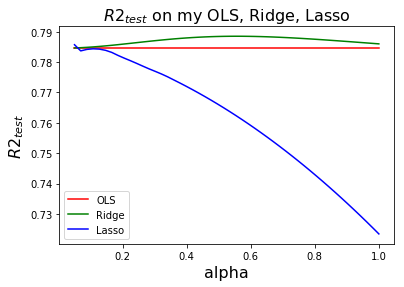

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt

N = 50
alphas = np.linspace(0.05, 1, N)
R2_test_matrix = np.ndarray([N, 3])

model_names = ['OLS', 'Ridge', 'Lasso']
colors = ['r', 'g', 'b']
linear = OLSRegression()
ridge = RidgeRegression()
lasso = LassoRegression()

for i, a in enumerate(alphas):
    ridge.set_params(a) # change hyper param (alpha) of ridge
    lasso.set_params(a) # change hyper param (alpha) of lasso
    models = [linear, ridge, lasso]
    
    for j, model in enumerate(models):
        model.fit(X_train, y_train) # Fit on training data
        R2_test_matrix[i,j] = model.score(X_test, y_test) # Score on testing data
        
for j, name in enumerate(model_names): # Plot R2_test three lines 
    plt.plot(alphas, R2_test_matrix[:,j], colors[j], label=name)

plt.title('$R2_{test}$ on my OLS, Ridge, Lasso', fontsize=16)
plt.xlabel('alpha', fontsize=16)
plt.ylabel('$R2_{test}$', fontsize=16)
plt.legend()
plt.show()